In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/AdityaT-19/ML-Lab/master/7/weather_forecast.csv")
data.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [11]:
desired_rows= 1500
data = pd.concat([data]*(desired_rows//len(data)),ignore_index=True)
data.shape

(1498, 5)

In [12]:
for col in data.columns:
    data[col] = data[col].map({x : (i+1) for i,x in enumerate(data[col].unique()) })
data.head()

,Outlook,Temperature,Humidity,Windy,Play
0,1,1,1,1,1
1,1,1,1,2,1
2,2,1,1,1,2
3,3,2,1,1,2
4,3,3,2,1,2


|--- Humidity <= 1.50
|   |--- Outlook <= 1.50
|   |   |--- class: No
|   |--- Outlook >  1.50
|   |   |--- Windy <= 1.50
|   |   |   |--- class: Yes
|   |   |--- Windy >  1.50
|   |   |   |--- class: No
|--- Humidity >  1.50
|   |--- Windy <= 1.50
|   |   |--- class: Yes
|   |--- Windy >  1.50
|   |   |--- Outlook <= 2.50
|   |   |   |--- class: Yes
|   |   |--- Outlook >  2.50
|   |   |   |--- class: No

Accuracy:  0.92


[Text(0.4444444444444444, 0.875, 'Humidity <= 1.5\ngini = 0.454\nsamples = 1198\nvalue = [417.0, 781.0]\nclass = Yes'),
 Text(0.2222222222222222, 0.625, 'Outlook <= 1.5\ngini = 0.493\nsamples = 591\nvalue = [330, 261]\nclass = No'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 247\nvalue = [247, 0]\nclass = No'),
 Text(0.3333333333333333, 0.375, 'Windy <= 1.5\ngini = 0.366\nsamples = 344\nvalue = [83, 261]\nclass = Yes'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 178\nvalue = [0, 178]\nclass = Yes'),
 Text(0.4444444444444444, 0.125, 'gini = 0.5\nsamples = 166\nvalue = [83, 83]\nclass = No'),
 Text(0.6666666666666666, 0.625, 'Windy <= 1.5\ngini = 0.246\nsamples = 607\nvalue = [87, 520]\nclass = Yes'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 345\nvalue = [0, 345]\nclass = Yes'),
 Text(0.7777777777777778, 0.375, 'Outlook <= 2.5\ngini = 0.444\nsamples = 262\nvalue

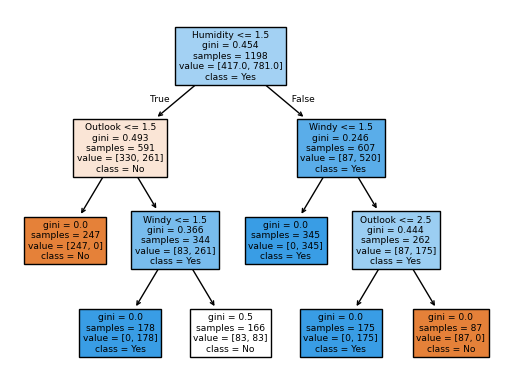

In [14]:
X = data.drop('Play', axis=1).values
Y = data['Play'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=32)

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, Y_train)
print(tree.export_text(classifier,max_depth=3,feature_names=list(data.columns[:-1]),class_names=['No','Yes']))
print("Accuracy: ",classifier.score(X_test,Y_test))
tree.plot_tree(classifier, filled=True, feature_names=list(data.columns[:-1]), class_names=['No','Yes'])